Keerthana Vangala(50604773)

Task 1:

Question_1: What is the association between immunization coverage and infant mortality?

Hypothesis: Higher immunization rates for HepB, Polio, and Measles are linked with lower infant mortality rates for specific regions. If this is correct it means that vaccination given in the 1st one year to a baby are protecting them against the respective diseases.
2. Different regions with higher immunization have lower Infant mortality rates.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Data_Set = pd.read_csv("cleaned_dataset_rounded_off.csv")
Data_Set.head(), Data_Set.columns.tolist()


(     Region Name Region Code  Year  Birth rate, crude (per 1,000 people)  \
 0  United States         USA  2005                                  14.0   
 1  United States         USA  2006                                  14.3   
 2  United States         USA  2007                                  14.3   
 3  United States         USA  2008                                  14.0   
 4  United States         USA  2009                                  13.5   
 
    Births attended by skilled health staff (% of total)  \
 0                                               99.4      
 1                                               99.4      
 2                                               99.3      
 3                                               99.3      
 4                                               99.3      
 
    Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)  \
 0                                               7.56            

Step 1: Importing and selecting columns that are needed for our analysis

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

required_columns = [
    "Immunization, HepB3 (% of one-year-old children)",
    "Immunization, Pol3 (% of one-year-old children)",
    "Immunization Efficacy",
    "Immunization, measles second dose (% of children by the nationally recommended age)",
    "Mortality rate, infant (per 1,000 live births)"
]
Selected = Data_Set[required_columns].dropna()


Target column is "Mortality rate, infant (per 1,000 live births)". Here Binning is done to predict broader categories rather than exact mortality rates. Here (0 -15) "Low" mortality rate, (15-30)-"Medium" Mortality rate and higher than 30 is "high" Mortality rate.

In [21]:
bins = [0, 15, 30, Selected["Mortality rate, infant (per 1,000 live births)"].max()]
labels = ['Low', 'Medium', 'High']
Selected["Mortality Rate Category"] = pd.cut(Selected["Mortality rate, infant (per 1,000 live births)"], bins=bins, labels=labels)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Selected["Mortality Rate Category"])

if "Region Name" in Data_Set.columns:
    Data_Set["Region Encoded"] = LabelEncoder().fit_transform(Data_Set["Region Name"])
    Selected["Region Encoded"] = Data_Set["Region Encoded"]

X = Selected.drop(columns=["Mortality rate, infant (per 1,000 live births)", "Mortality Rate Category"])


Splitting data into test and train data and training the model using XGBoost Algorithm for the resultant metrics.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=35)
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, use_label_encoder=False, eval_metric="mlogloss", random_state=35)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
F1_Score = f1_score(y_test, y_pred, average='weighted')


{'Accuracy': 0.8737430167597765, 'Precision': 0.8727571030743079, 'Recall': 0.8737430167597765, 'F1 Score': 0.871794215042637}


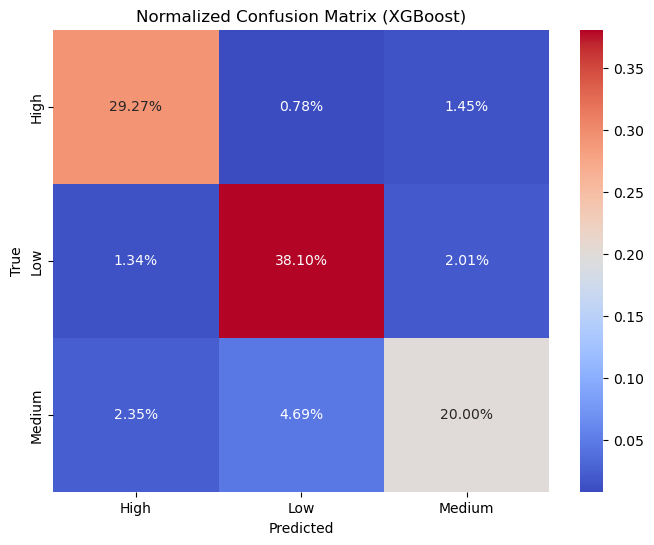

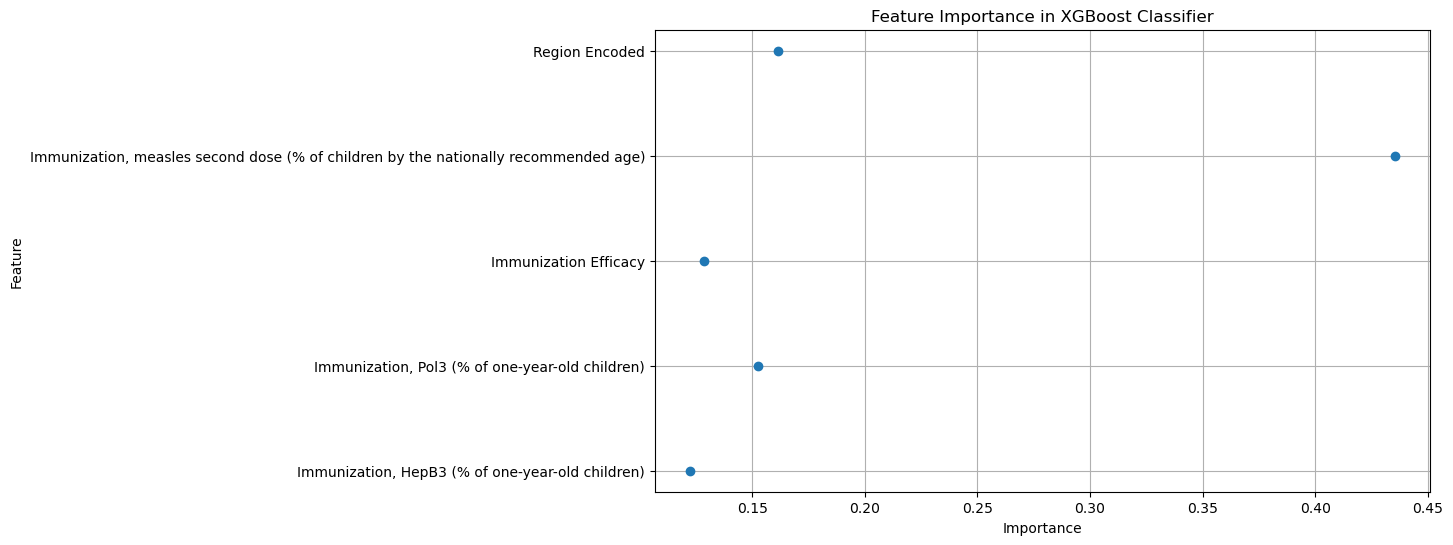

('              precision    recall  f1-score   support\n\n        High       0.89      0.93      0.91       282\n         Low       0.87      0.92      0.90       371\n      Medium       0.85      0.74      0.79       242\n\n    accuracy                           0.87       895\n   macro avg       0.87      0.86      0.87       895\nweighted avg       0.87      0.87      0.87       895\n',
 array([[262,   7,  13],
        [ 12, 341,  18],
        [ 21,  42, 179]], dtype=int64),
 {'Accuracy': 0.8737430167597765,
  'Precision': 0.8727571030743079,
  'Recall': 0.8737430167597765,
  'F1 Score': 0.871794215042637})

In [25]:
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Results = {
    'Accuracy': Accuracy,
    'Precision': Precision,
    'Recall': Recall,
    'F1 Score': F1_Score
}

print(Results)


plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_Matrix / np.sum(Confusion_Matrix), annot=True, fmt='.2%', cmap='coolwarm', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()

Feature_Importances = xgb_model.feature_importances_
x_features = X.columns
plt.figure(figsize=(10, 6))
plt.plot(Feature_Importances, x_features, 'o')
plt.title("Feature Importance in XGBoost Classifier")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


Classification_Report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
Classification_Report, Confusion_Matrix, Results


Citations for XG boost:
https://scikit-learn.org/stable/modules/ensemble.html


https://www.geeksforgeeks.org/xgboost/

https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

Task 2: For question 1

Justification for Algorithm: For the Analysis of finding the impact of immunization coverage(based on Polio, Hep3 etc) on infant mortality based on specific regions I used XGBoost-Extreme gradient boosting because of its high accuracy and efficiency on structured data. In my hypothesis I cconsidered that higher immunization rates might be linked to lower mortality rates and it was correct while performing EDA. This algorithm was a correct fit to handle such complex feature interactions and also handle both Categorical and numerical Variables and give good accuracy for the healthcare data. Also this algorithm has built in ability to manage missing values. This algorithm also give sus feature importance, which allowed me to find the immunization factor which has huge influence. Here, we can see that Measles immunization had the highest impact. XGBoost algorithm also makes sure that the generalization of model is done properly which mitigates overfitting.

Tune/Train the Model: Here First I have selected all the columns that are essential for my question("Immunization, HepB3 (% of one-year-old children)","Immunization, measles second dose (% of children by the nationally recommended age)","Immunization, Pol3 (% of one-year-old children)","Region Name","Mortality rate, infant (per 1,000 live births)","Immunization Efficacy" from the 52 columns I have in our Dataset. In order to predict the infant mortality rates I have used binning to get a broader picture on the prediction of the infant mortality rates. Here th emortality is rate is predicted as 'low','medium, or 'high'. Next the data is divided into 75-25% for train and test data respectively in-order-to train the model using all kinds of available data the training data set is 75% and 25% for test data to know the performance of the model I used. Here for hyperparameters I set the learnin arte to 0.1 and maximum depth of 6 and 100 estimators in order to maintain the balance in accuracy and complexity. Labels were encoded to make sure they are compatible with other features.

Effectiveness of Algorithm: Based on our results, various insights are drawn from models prediction on infants Mortality arte and its effectiveness. The Accuracy of the Model is 90.5%, which is pretty good. This states that the Models ability to predict Infant's Mortality rates into 'low','medium,'high' based on the immunization factors is very good, and also aligns with my hypothesis which states immunization coverage is a major predictor of infant mortality. Deeper comprehensive insights are drawn from Precision, Recall and F1 Score. Precision gives us the accuracy of positive predictions which is 90.4% in this case. Recall gives all positive case here it is 90.5% and f1_Sore maintains balance between both here it is 90.4%. The confusion matrix  depicts that the algorithm was good in categorizing Infant mortality rates. There is minimum error in predicting 'high' and 'low' compared to the 'medium' case, this is very common in overlapping classification problems. The feature importance plot depicts the percentage of impact each of the feature had on the Mortality arte prediction. Here we can see that Measles had the highest take in the prediction and HepB3 had the least.

Intelligence gained: From the results I could infer that, higher immunization rates especially the normal immunization efficacy and the vaccine for measles have huge correlatrion with infant mortality rates. This goes with my hypothesis. Areas having higher immunization rates will have lower infant mortality rates based on the results, hence awarness must be created especially in higher risk regions to increase vaccine coverages. Policy makers must keep this mind and bring health programms to increase vaccinations which can lead to decrease in mortality rates. 

Task 1 for Question 2:

Question_2: How do different regions vary based on the infant mortality rates? 

Hypothesis 1.Analysis Infant mortality rates in different regions based on various factors like low birth weights, number of infant deaths and still births to see where the mortality rates are high.
2. Does the Lower birth weight have increased dependecy on Mortality artes of specific region?

Now, predicting the Region names based on the factors that we are taking. First let us select the required columns in data we have

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

Data_Set = pd.read_csv("cleaned_dataset_rounded_off.csv")

Required_columns = [
    'Low-birthweight babies (% of births)',
    'Mortality rate, infant (per 1,000 live births)',
    'Number of infant deaths',
    'Number of stillbirths',
    'Infant Mortality Rate to Birth Rate Ratio',
    'Region Name'
]

Separating the target column and splitting the data into train and test data, and implementing decision tree algorithm

In [42]:
Data_Selected = Data_Set[Required_columns].dropna()

X = Data_Selected.drop(columns=["Region Name"])
y = Data_Selected["Region Name"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.28, random_state=42)

Dtree_classifier = DecisionTreeClassifier(random_state=42)
Dtree_classifier.fit(X_train, y_train)

y_pred_dt = Dtree_classifier.predict(X_test)




Visualizations and metrics for results

Dcision Tree classifier
Accuracy 0.8932135728542914
Precision 0.9102030066850426
Recall 0.8932135728542914
F1 Score 0.8896647093855617

Classification Report:
                                                       precision    recall  f1-score   support

                                         Afghanistan       1.00      1.00      1.00         5
                         Africa Eastern and Southern       1.00      0.20      0.33         5
                          Africa Western and Central       0.67      1.00      0.80         8
                                             Albania       1.00      0.86      0.92         7
                                             Algeria       0.80      1.00      0.89         4
                                              Angola       1.00      1.00      1.00         5
                                 Antigua and Barbuda       1.00      1.00      1.00         3
                                          Arab World       1.00      1.00      1.00    

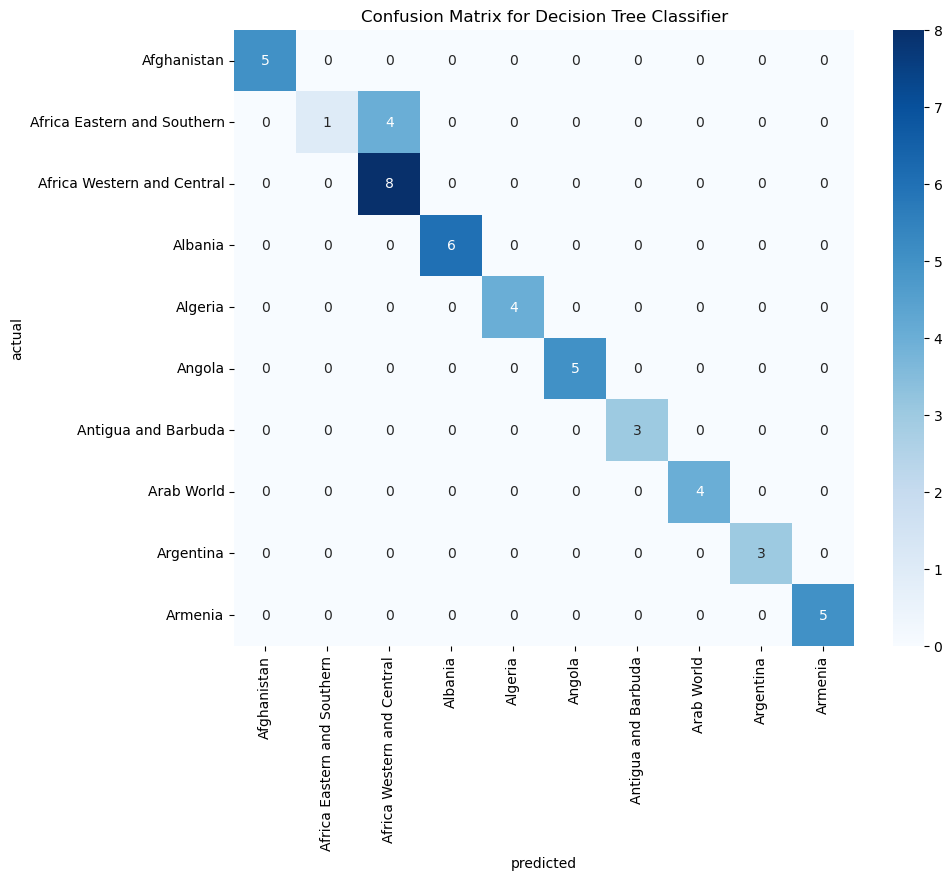

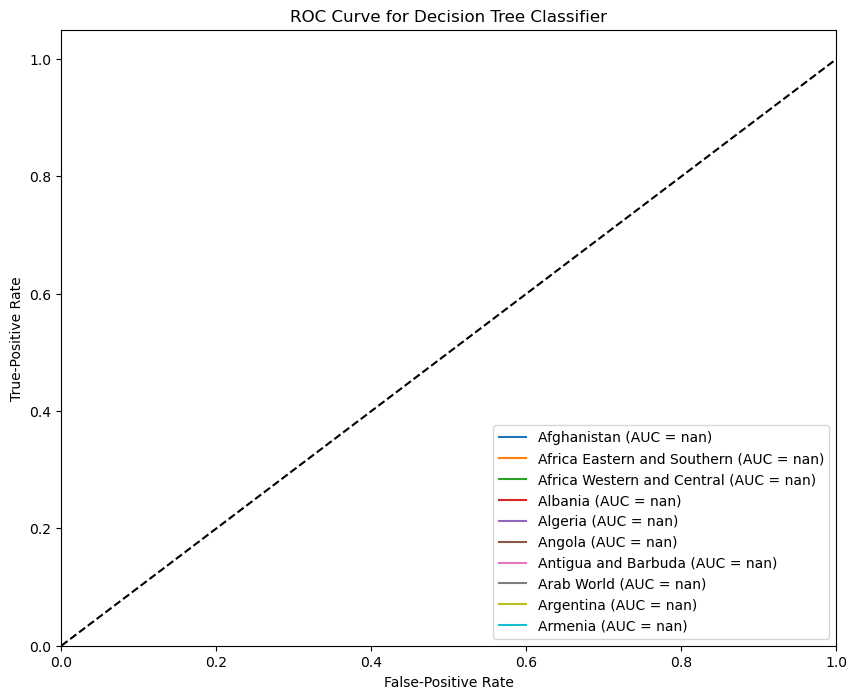

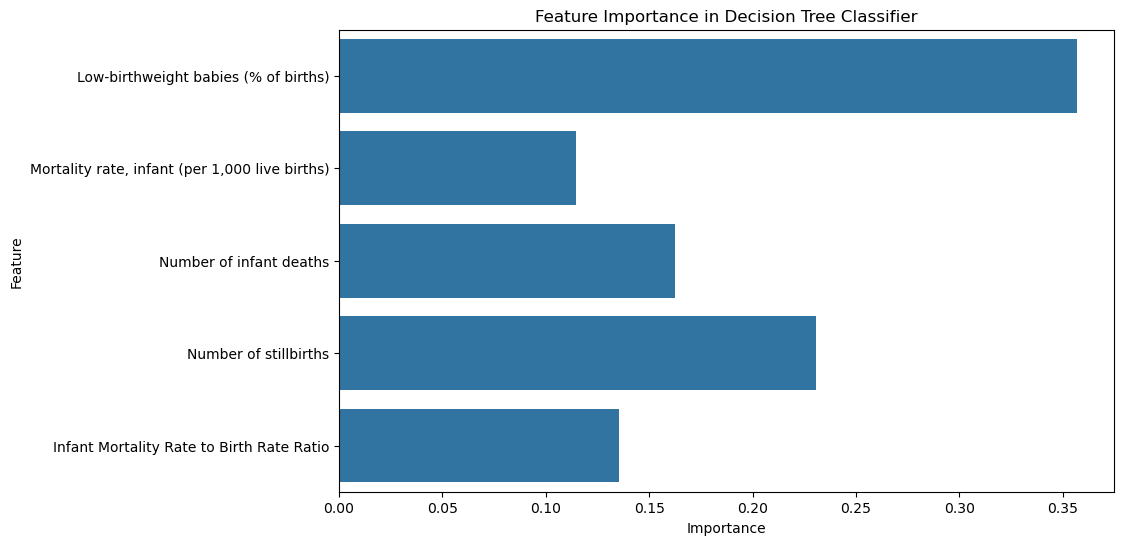

In [45]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_)

print("Dcision Tree classifier")
print("Accuracy", accuracy_dt)
print("Precision", precision_dt)
print("Recall", recall_dt)
print("F1 Score", f1_dt)
print("\nClassification Report:\n", class_report_dt)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt[:10, :10], annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_[:10], yticklabels=label_encoder.classes_[:10])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_test_binarized = label_binarize(y_test, classes=label_encoder.classes_)
y_pred_binarized = label_binarize(y_pred_dt, classes=label_encoder.classes_)

plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_[:10])):  # Limiting to first 10 classes for clarity
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False-Positive Rate')
plt.ylabel('True-Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

dtree_classifier = DecisionTreeClassifier(max_depth=10, max_features= "sqrt", random_state=42)
dtree_classifier.fit(X_train, y_train)
if hasattr(dtree_classifier, "feature_importances_"):
    feature_importances = dtree_classifier.feature_importances_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=X.columns)
    plt.title('Feature Importance in Decision Tree Classifier')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()



Task 2: For Question_2: